# **About The Dataset:**
This file is a sqlite database. It contains a table named user whose columns are :

1. user_id
2. name
3. photo_url
4. username
5. twitter
6. Instagram
7. num_followers
8. num_following
9. time_created
10. invitedbyuser_profile


# 1. Importing The Required Modules

In [1]:
import numpy as np 
import pandas as pd 
import os
import sqlite3
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



# 2. Loading The Dataset

In [2]:
#Data is present as a sql table and not csv file, therefore, creating a connection and reading the sql data and then creating a Dataframe from it.

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

database='/kaggle/input/clubhouse-dataset/Clubhouse_Dataset_v1.db'
connection = sqlite3.connect(database)

club = pd.read_sql("select * from user", con=connection)
club  = club.replace(to_replace ='null',value =np.nan)
club.head(5)


/kaggle/input/clubhouse-dataset/Clubhouse_Dataset_v2.db
/kaggle/input/clubhouse-dataset/Clubhouse_Dataset_v1.db
/kaggle/input/clubhouse-dataset/Clubhouse_Dataset_v3.db
/kaggle/input/clubhouse-dataset/Clubhouse_Dataset_v6.db
/kaggle/input/clubhouse-dataset/Clubhouse_Dataset_v5.db
/kaggle/input/clubhouse-dataset/Clubhouse_Dataset_v4.db


,user_id,name,photo_url,username,twitter,instagram,num_followers,num_following,time_created,invited_by_user_profile
0,4,Rohan Seth,https://clubhouseprod.s3.amazonaws.com:443/4_b...,rohan,rohanseth,NaN,4187268,599,2020-03-17T07:51:28.085566+00:00,NaN
1,5,Paul Davison,https://clubhouseprod.s3.amazonaws.com:443/5_e...,paul,pdavison,NaN,3718334,1861,2020-03-17T14:36:19.468976+00:00,NaN
2,8,Johnny Appleseed,None,apple1,NaN,srt_tester_9,20,81,2020-03-19T19:47:00.323603+00:00,NaN
3,10,DK 🖍,https://clubhouseprod.s3.amazonaws.com:443/10_...,dk,dksf,NaN,49538,173,2020-03-19T23:38:52.574777+00:00,NaN
4,12,Jonathan Gheller,https://clubhouseprod.s3.amazonaws.com:443/12_...,jonathan,jgheller,NaN,21250,81,2020-03-20T02:30:22.188084+00:00,NaN


# 3. Analyzing the data

**3.1 Shape of the dataframe**

In [3]:
print(f"Number of rows in the dataframe are {club.shape[0]} and number of columns are {club.shape[1]}")

Number of rows in the dataframe are 1300515 and number of columns are 10


**3.2 Checking the count of categorical attributes and nummerical attributes**

In [4]:
club.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300515 entries, 0 to 1300514
Data columns (total 10 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   user_id                  1300515 non-null  int64  
 1   name                     1300515 non-null  object 
 2   photo_url                1236637 non-null  object 
 3   username                 1300514 non-null  object 
 4   twitter                  449648 non-null   object 
 5   instagram                623567 non-null   object 
 6   num_followers            1300515 non-null  int64  
 7   num_following            1300515 non-null  int64  
 8   time_created             1300515 non-null  object 
 9   invited_by_user_profile  1297301 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 99.2+ MB


> * Categorical attributes: 7 
> * Numeric attributes: 3

In [5]:
club.describe()

,user_id,num_followers,num_following,invited_by_user_profile
count,1.300515e+06,1.300515e+06,1.300515e+06,1.297301e+06
mean,7.303800e+05,2.603839e+02,1.154931e+02,1.110600e+07
std,4.276844e+05,1.674231e+04,1.945045e+02,1.222079e+08
min,4.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
25%,3.592120e+05,1.400000e+01,2.600000e+01,1.555170e+05
50%,7.258520e+05,3.700000e+01,6.100000e+01,4.235720e+05
75%,1.099280e+06,9.900000e+01,1.190000e+02,8.090850e+05
max,1.499999e+06,4.187268e+06,2.504000e+03,2.147154e+09


**3.3 Checking the null values**

In [6]:
mr=pd.DataFrame({'Column Name': club.columns,'Missing Records Percentage': club.isnull().sum() * 100 / len(club)})
mr.reset_index(inplace = True, drop = True)
mr

,Column Name,Missing Records Percentage
0,user_id,0.000000
1,name,0.000000
2,photo_url,4.911747
3,username,0.000077
4,twitter,65.425389
5,instagram,52.052302
6,num_followers,0.000000
7,num_following,0.000000
8,time_created,0.000000
9,invited_by_user_profile,0.247133


> There are significantly high missing values in the columns 'instagram' and 'twitter'.

**3.4 Checking duplicate rows**

In [7]:
club[club.duplicated()]

,user_id,name,photo_url,username,twitter,instagram,num_followers,num_following,time_created,invited_by_user_profile


> No duplicate rows found

# **4. Data Visualization**

**4.1 Visualizing the missing values**

<AxesSubplot:>

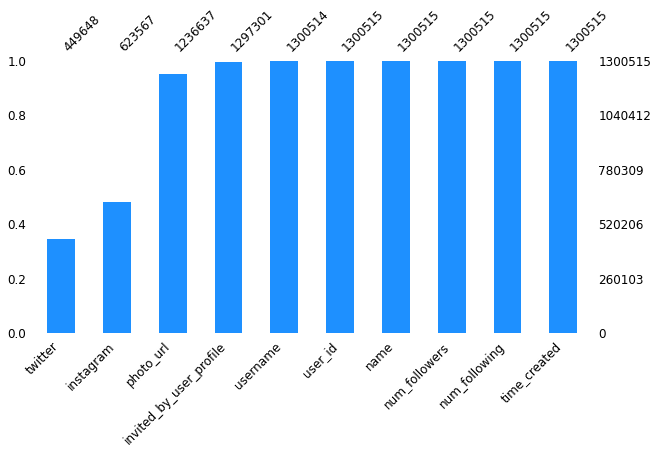

In [8]:
msno.bar(club,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)


> Highest missing values for twitter, followed by Instagram.

**4.2 People with highest number of followers**

In [15]:
highest_followers=club.sort_values('num_followers',ascending=False).head(5)



fig = px.bar(x=highest_followers.name, y = highest_followers.num_followers, title='People with highest followers Vs Count',)
fig.update_traces( textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()




> Rohan Seth has the highest number of followers.

**4.3 People with highest following**

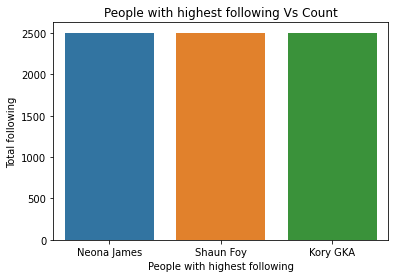

In [10]:
highest_following=club.sort_values('num_following',ascending=False).head(3)

sns.barplot(x = highest_following.name, y = highest_following.num_following,)
plt.title('People with highest following Vs Count')
plt.ylabel('Total following')
plt.xlabel('People with highest following')

plt.show()


> All 3 people shown here are following the same count of people.

**4.4 Number of people who use Twitter Vs Instagram**

In [11]:
data=[['Twitter', len(club[club.twitter.notnull()==True])], ['Instagram',len(club[club.instagram.notnull()==True])]]
df=pd.DataFrame(data,columns=['apps','coun'])
fig = px.pie(df, values='coun', names='apps')
fig.update_traces(textposition='inside', textfont_size=14)
fig.show()

> Number of people who use instagram are higher.

**4.5 People having accounts on both twitter and instagram vs people having no account**

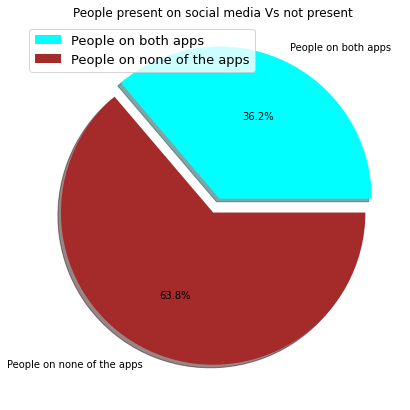

In [12]:
acc = len(club[( ((club.twitter.notnull()==True) ) & ((club.instagram.notnull()==True)  ))])
no_acc = len(club[( ((club.twitter.isnull()==True) ) & ((club.instagram.isnull()==True)  ))])
data=[['People on both apps', acc], ['People on none of the apps',no_acc ]]
df=pd.DataFrame(data,columns=['present','coun'])

fig, ax = plt.subplots(figsize =(10, 7))
plt.pie(df.coun, labels = df.present,autopct='%1.1f%%',explode=(0.1,0.0),shadow=True,colors=("cyan", "brown"))
ax.set_title("People present on social media Vs not present")
ax.legend(title='Social media')
plt.legend(loc=2, prop={'size': 13})

> * 63.8 % people do not use any social media applications
> * 36.2 % people use both social media applications

**4.6 People who got invitation vs who did not**

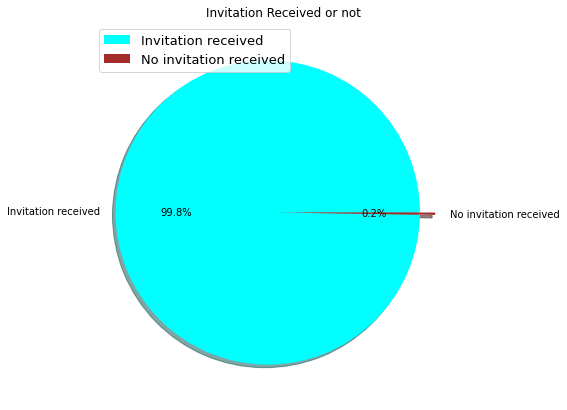

In [13]:
yes = len(club[( ((club.invited_by_user_profile.notnull()==True) ))]) 
no = len(club[( ((club.invited_by_user_profile.notnull()==False) ) )])
data=[['Invitation received', yes], ['No invitation received',no ]]
df=pd.DataFrame(data,columns=['present','coun'])

fig, ax = plt.subplots(figsize =(10, 7))
plt.pie(df.coun, labels = df.present,autopct='%1.1f%%',explode=(0.1,0.0),shadow=True,colors=("cyan", "brown"))
ax.set_title("Invitation Received or not")
ax.legend(title='Social media')
plt.legend(loc=2, prop={'size': 13})


0.2 % people did not receive any invite.

**4.7 People having profile picture vs not**

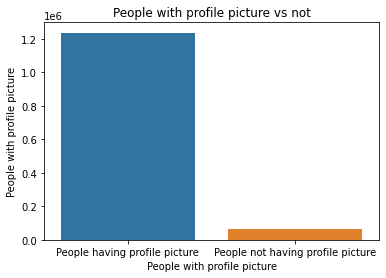

In [14]:
pp = len(club[( ((club.photo_url.notnull()==True) ))]) 
npp = len(club[( ((club.photo_url.notnull()==False) ) )])
data=[['People having profile picture', pp], ['People not having profile picture',npp ]]
df=pd.DataFrame(data,columns=['present','coun'])


sns.barplot(x = df.present, y = df.coun,)
plt.title('People with profile picture vs not')
plt.ylabel('People with profile picture')
plt.xlabel('People with profile picture')
plt.show()

> People not having profile pictures are significantly less.